RMSE for lambda = 2 is 0.9690139803880948
RMSE for lambda = 5 is 0.984671809640481
RMSE for lambda = 20 is 0.21948843077139552
RMSE for lambda = 50 is 0.06903862096520184
RMSE for lambda = 100 is 0.06602791139245534


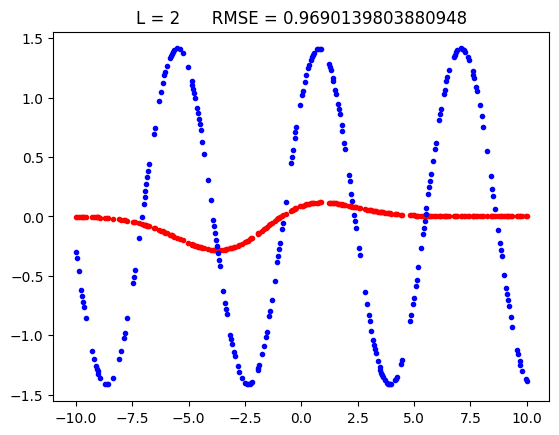

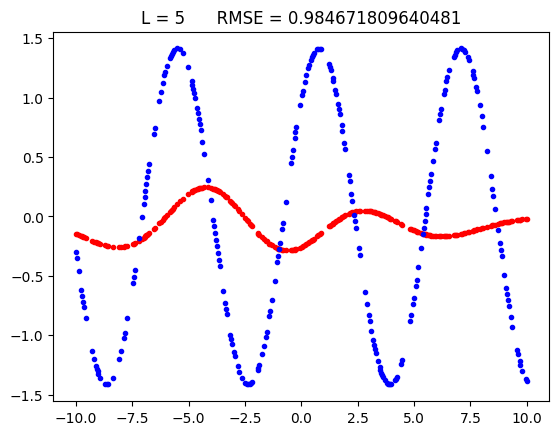

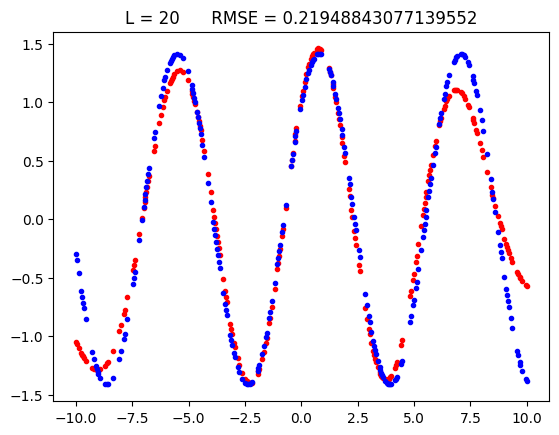

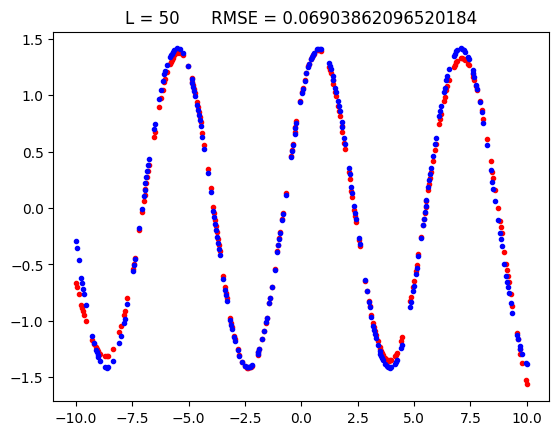

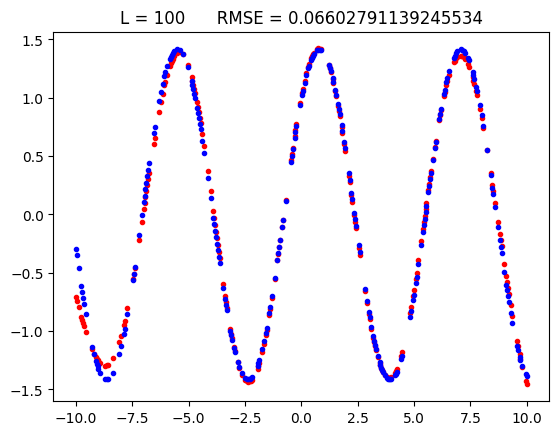

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.genfromtxt('/content/drive/MyDrive/data/data/ridgetrain.txt',delimiter='  ')[:,0]
y_train = np.genfromtxt('/content/drive/MyDrive/data/data/ridgetrain.txt',delimiter='  ')[:,1]
x_test = np.genfromtxt('/content/drive/MyDrive/data/data/ridgetest.txt',delimiter='  ')[:,0]
y_test = np.genfromtxt('/content/drive/MyDrive/data/data/ridgetest.txt',delimiter='  ')[:,1]

def landmark(x, y):
    return np.exp(-0.1*np.square(x.reshape((-1,1)) - y.reshape((1,-1))))

landmarks = [2, 5, 20, 50, 100]

for L in landmarks:
    z = np.random.choice(x_train, L)
    I= np.eye(L)
    xf_train = landmark(x_train, z)
    W = np.dot(np.linalg.inv(np.dot(xf_train.T, xf_train) + 0.1*I), np.dot(xf_train.T, y_train.reshape((-1,1))))
    xf_test = landmark(x_test, z)
    y_pred = np.dot(xf_test, W)

    rmse = np.sqrt(np.mean(np.square(y_test.reshape((-1,1)) - y_pred)))
    print('RMSE for lambda = ' + str(L) + ' is ' + str(rmse))

    plt.figure(L)
    plt.title('L = ' + str(L) + '      RMSE = ' + str(rmse))
    plt.plot(x_test, y_pred, 'r.')
    plt.plot(x_test, y_test, 'b.')

plt.show()